In [1]:
import tensorflow as tf
tf.__version__

'2.1.0'

# New Section

In [5]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import cv2
import keras as kf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [4]:
emotion_data = pd.read_csv('fer2013.csv')
emotion_data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [5]:
emotion_data['Usage'].value_counts()

Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64

In [2]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

#Sequential to build a model layer by layer..Each layer has weights that correspond to the layer the follows it..
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation, Flatten  
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
#categorical_crossentropy : don't know
from keras.losses import categorical_crossentropy  
#adam:replacement optimization algorithm for stochastic gradient descent for training deep learning models.#don't understand what it is 
from keras.optimizers import Adam  
#l2:allows you to add a penalty for weight size to the loss function
from keras.regularizers import l2 
#np_utils:Numpy-related utilities. 
from keras.utils import np_utils  
import pandas as pd
df=pd.read_csv('fer2013.csv')  
X_train,train_y,X_test,test_y=[],[],[],[]  

for index, row in df.iterrows():  
    val=row['pixels'].split(" ")  
    try:  
        if 'Training' in row['Usage']:  
           X_train.append(np.array(val,'float32'))  
           train_y.append(row['emotion'])  
        elif 'PublicTest' in row['Usage']:  
           X_test.append(np.array(val,'float32'))  
           test_y.append(row['emotion'])  
    except:  
        print(f"error occured at index :{index} and row:{row}")  


num_features = 64  
num_labels = 7  
batch_size = 64  
epochs = 30  
width, height = 48, 48  


X_train = np.array(X_train,'float32')  
train_y = np.array(train_y,'float32')  
X_test = np.array(X_test,'float32')  
test_y = np.array(test_y,'float32')  

train_y=np_utils.to_categorical(train_y, num_classes=num_labels)  
test_y=np_utils.to_categorical(test_y, num_classes=num_labels)  

#cannot produce  
#normalizing data between oand 1  
X_train -= np.mean(X_train, axis=0)  
X_train /= np.std(X_train, axis=0)  

X_test -= np.mean(X_test, axis=0)  
X_test /= np.std(X_test, axis=0)  

X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)  

X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)  

# print(f"shape:{X_train.shape}")  
##designing the cnn  
#1st convolution layer  
model = Sequential()  
#ist layer
model.add(Conv2D(32,(3,3),padding='same',input_shape=(X_train.shape[1:])))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',input_shape=(img_rows,img_cols,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2, 2)))
model.add(Dropout(0.2))
# model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(X_train.shape[1:])))  
# model.add(Conv2D(64,kernel_size= (3, 3), activation='relu'))  
# # model.add(BatchNormalization())  
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))  
# model.add(Dropout(0.5))  

########################

#2nd convolution layer  
model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2, 2)))
model.add(Dropout(0.2))
# #2nd convolution layer  
# model.add(Conv2D(64, (3, 3), activation='relu'))  
# model.add(Conv2D(64, (3, 3), activation='relu'))  
# # model.add(BatchNormalization())  
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))  
# model.add(Dropout(0.5))  

########################

#3rd convolution layer 
model.add(Conv2D(128,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.2))

# model.add(Conv2D(128, (3, 3), activation='relu'))  
# model.add(Conv2D(128, (3, 3), activation='relu'))  
# # model.add(BatchNormalization())  
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))  

########################

#4th convolution layer

model.add(Conv2D(256,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.2))

########################

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
 

model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1024, activation='relu'))  
model.add(Dropout(0.2))  

model.add(Dense(num_labels, activation='softmax'))  

# model.summary()  

#Compliling the model  
model.compile(loss='categorical_crossentropy',  
              optimizer=Adam(lr=0.001),  
              metrics=['accuracy'])  
##
earlystop=EarlyStopping(monitor='val_loss',min_delta=0,
                        patience=3,
                        verbose=1,
                        restore_best_weights=True)
##
reduce_lr=ReduceLROnPlateau(monitor='var_loss',
                            factor=0.2,
                            patience=3,
                            verbose=1,
                            min_delta=0.0001)
##
callbacks=[earlystop,reduce_lr]
#Training the model  
model.fit(X_train, train_y,  
          batch_size=batch_size,  
          epochs=epochs,  
          callbacks=callbacks,  
          validation_data=(X_test, test_y),  
          shuffle=True)  


#Saving the  model to  use it later on  
fer_json = model.to_json()  
with open("fer2.json", "w") as json_file:  
    json_file.write(fer_json)  
model.save_weights("fer2.h5") 

In [2]:
#videotesting file
import os  
import cv2  
import numpy as np  
from keras.models import model_from_json  
from keras.preprocessing import image  

#load model  
model = model_from_json(open("fer.json", "r").read())  
#load weights  
model.load_weights('fer.h5')  

In [23]:
#videotesting file
import os  
import cv2  
import numpy as np  
from keras.models import model_from_json  
from keras.preprocessing import image  

#load model  
model = model_from_json(open("fer3.json", "r").read())  
#load weights  
model.load_weights('fer3.h5')  


face_haar_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')  


cap=cv2.VideoCapture(0)  

while True:  
    ret,test_img=cap.read()# captures frame and returns boolean value and captured image  
    if not ret:  
        continue  
    gray_img= cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)  

    faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)  


    for (x,y,w,h) in faces_detected:  
        cv2.rectangle(test_img,(x,y),(x+w,y+h),(255,0,0),thickness=4)  
        roi_gray=gray_img[y:y+w,x:x+h]#cropping region of interest i.e. face area from  image  
        roi_gray=cv2.resize(roi_gray,(48,48))  
        img_pixels = image.img_to_array(roi_gray)  
        img_pixels = np.expand_dims(img_pixels, axis = 0)  
        #img_pixels /= 255  

        predictions = model.predict(img_pixels)  

        #find max indexed array  
        max_index = np.argmax(predictions[0])  

        emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')  
        predicted_emotion = emotions[max_index]  

        cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 2)  

    resized_img = cv2.resize(test_img, (1000, 700))  
    cv2.imshow('Facial emotion analysis ',resized_img)  



    if cv2.waitKey(10) == ord('q'):#wait until 'q' key is pressed  
        break  

cap.release()  
cv2.destroyAllWindows 

<function destroyAllWindows>

In [4]:
#videotesting file
import os  
import cv2  
import numpy as np  
from keras.models import model_from_json  
from keras.preprocessing import image  

#load model  
model = model_from_json(open("models/feraug2disonly.json", "r").read())  
#load weights  
model.load_weights('models/feraug2disonly.h5')  

img = cv2.imread("snapshots/3.png")

face_haar_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')  
cv2.imshow('Facial emotion analysis ',img)

#cap=cv2.VideoCapture(0)  

 
#ret,test_img=img# captures frame and returns boolean value and captured image  
  
gray_img= cv2.cvtColor(img.copy(), cv2.COLOR_BGR2GRAY)  
print(gray_img)
faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)  


for (x,y,w,h) in faces_detected:  
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),thickness=4)  
    roi_gray=gray_img[y:y+w,x:x+h]#cropping region of interest i.e. face area from  image  
    roi_gray=cv2.resize(roi_gray,(48,48))  
    img_pixels = image.img_to_array(roi_gray)  
    img_pixels = np.expand_dims(img_pixels, axis = 0)  
        #img_pixels /= 255  

    predictions = model.predict(img_pixels)  

        #find max indexed array  
    max_index = np.argmax(predictions[0])  

    emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')  
    predicted_emotion = emotions[max_index]  
    cv2.putText(img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 2)  

resized_img = cv2.resize(img, (1000, 700))  
cv2.imshow('Facial emotion analysis ',resized_img)  



# cv2.imshow("Emotion Detector", image)
cv2.waitKey(0)

cv2.destroyAllWindows()

[[24 24 24 ...  5  5  5]
 [24 24 24 ...  5  5  5]
 [24 24 24 ...  5  5  5]
 ...
 [24 24 24 ...  4  4  4]
 [24 24 24 ...  4  4  4]
 [24 24 24 ...  4  4  4]]


In [17]:
from PIL import Image, ImageEnhance
import numpy as np
#read the image
im = Image.open("test/angry/PrivateTest_10131363.jpg")
print(np.array(list(im.getdata()),'float32'))
#image brightness enhancer
enhancer = ImageEnhance.Brightness(im)

# factor = 1 #gives original image
# im_output = enhancer.enhance(factor)
# Image.show(im_output)
#im_output.save('original-image.png')

factor = 0.1 #darkens the image
im_output = enhancer.enhance(factor)
#im_output.show()
pix=list(im_output.getdata())
print(np.array(pix))
#pix=pix.split(',')
#print(pix)
#im_output.save('angry_PrivateTest_10131363.jpg-0.1.jpg')

# factor = 1.5 #brightens the image
# im_output = enhancer.enhance(factor)
# im_output.show()
#im_output.save('brightened-image.png')

[ 46.  34.  26. ... 165. 180. 189.]
[ 4  3  2 ... 16 18 18]


In [7]:
image = cv2.imread("thermal1.jpg")

In [8]:
import numpy as np
import cv2  
from keras.preprocessing import image  

invGamma = 1.0 / 0.4
table = np.array([((i / 255.0) ** invGamma) * 255
    for i in np.arange(0, 256)]).astype("uint8")

# apply gamma correction using the lookup table
res=cv2.LUT(image, table)
cv.imshow('a',res)

TypeError: Expected Ptr<cv::UMat> for argument 'src'

In [1]:
from __future__ import print_function
from builtins import input
import cv2 as cv
import numpy as np
import argparse
# Read image given by user
# parser = argparse.ArgumentParser(description='Code for Changing the contrast and brightness of an image! tutorial.')
# parser.add_argument('--input', help='Path to input image.', default='lena.jpg')
# args = parser.parse_args()
image = cv.imread("audience.png")
if image is None:
    print('Could not open or find the image: ', args.input)
    exit(0)
new_image = np.zeros(image.shape, image.dtype)
alpha = 1.0 # Simple contrast control
beta = 0    # Simple brightness control
# Initialize values
print(' Basic Linear Transforms ')
print('-------------------------')
try:
    alpha = float(input('* Enter the alpha value [1.0-3.0]: '))
    beta = int(input('* Enter the beta value [0-100]: '))
except ValueError:
    print('Error, not a number')
# Do the operation new_image(i,j) = alpha*image(i,j) + beta
# Instead of these 'for' loops we could have used simply:
# new_image = cv.convertScaleAbs(image, alpha=alpha, beta=beta)
# but we wanted to show you how to access the pixels :)
for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        for c in range(image.shape[2]):
            new_image[y,x,c] = np.clip(alpha*image[y,x,c] + beta, 0, 255)
cv.imshow('Original Image', image)
cv.imshow('New Image', new_image)
#cv.imwrite('surpriseaplha0.2beta20.jpg')
# Wait until user press some key
cv.waitKey()


NameError: name 'args' is not defined

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image

df = pd.read_csv('fer2013.csv')

for image_pixels in df2.iloc[1:,1]: #column 2 has the pixels. Row 1 is column name.
    image_string = image_pixels.split(' ') #pixels are separated by spaces.
    image_data = np.asarray(image_string, dtype=np.uint8).reshape(48,48)
    img = Image.fromarray(image_data) #final image
    plt.imshow(img, interpolation='none')

In [2]:
######
# per class accuracy calculation(('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral') )

In [44]:
pu_a,pu_d,pu_f,pu_h,pu_sa,pu_s,pu_n=[],[],[],[],[],[],[]
pu_a_y,pu_d_y,pu_f_y,pu_h_y,pu_sa_y,pu_s_y,pu_n_y=[],[],[],[],[],[],[]
#######
pr_a,pr_d,pr_f,pr_h,pr_sa,pr_s,pr_n=[],[],[],[],[],[],[]
pr_a_y,pr_d_y,pr_f_y,pr_h_y,pr_sa_y,pr_s_y,pr_n_y=[],[],[],[],[],[],[]

In [45]:
# 1. angry
from keras.utils import np_utils  
df=pd.read_csv("fer2013.csv")
for index, row in df.iterrows():  
    val=row['pixels'].split(" ")
    if 'PublicTest' in row['Usage']:
        if row['emotion']==0:
            pu_a.append(np.array(val,'float32'))
            pu_a_y.append(row['emotion'])
        elif row['emotion']==1:
            pu_d.append(np.array(val,'float32'))
            pu_d_y.append(row['emotion'])
        elif row['emotion']==2:
            pu_f.append(np.array(val,'float32'))
            pu_f_y.append(row['emotion'])
        elif row['emotion']==3:
            pu_h.append(np.array(val,'float32'))
            pu_h_y.append(row['emotion'])
        elif row['emotion']==4:
            pu_sa.append(np.array(val,'float32'))
            pu_sa_y.append(row['emotion'])
        elif row['emotion']==5:
            pu_s.append(np.array(val,'float32'))
            pu_s_y.append(row['emotion'])
        elif row['emotion']==6:
            pu_n.append(np.array(val,'float32'))
            pu_n_y.append(row['emotion'])
    elif 'PrivateTest' in row['Usage']:
        if row['emotion']==0:
            pr_a.append(np.array(val,'float32'))
            pr_a_y.append(row['emotion'])
        elif row['emotion']==1:
            pr_d.append(np.array(val,'float32'))
            pr_d_y.append(row['emotion'])
        elif row['emotion']==2:
            pr_f.append(np.array(val,'float32'))
            pr_f_y.append(row['emotion'])
        elif row['emotion']==3:
            pr_h.append(np.array(val,'float32'))
            pr_h_y.append(row['emotion'])
        elif row['emotion']==4:
            pr_sa.append(np.array(val,'float32'))
            pr_sa_y.append(row['emotion'])
        elif row['emotion']==5:
            pr_s.append(np.array(val,'float32'))
            pr_s_y.append(row['emotion'])
        elif row['emotion']==6:
            pr_n.append(np.array(val,'float32'))
            pr_n_y.append(row['emotion'])

In [46]:
 
num_labels = 7   
width, height = 48, 48  
pu_a = np.array(pu_a,'float32')  
pu_a_y = np.array(pu_a_y,'float32')  
pu_d = np.array(pu_d,'float32')  
pu_d_y = np.array(pu_d_y,'float32')  
pu_f = np.array(pu_f,'float32')  
pu_f_y = np.array(pu_f_y,'float32')  
pu_h = np.array(pu_h,'float32')  
pu_h_y = np.array(pu_h_y,'float32')  
pu_sa = np.array(pu_sa,'float32')  
pu_sa_y = np.array(pu_sa_y,'float32')  
pu_s = np.array(pu_s,'float32')  
pu_s_y = np.array(pu_s_y,'float32')  
pu_n = np.array(pu_n,'float32')  
pu_n_y = np.array(pu_n_y,'float32')  
####
pr_a = np.array(pr_a,'float32')  
pr_a_y = np.array(pr_a_y,'float32')  
pr_d = np.array(pr_d,'float32')  
pr_d_y = np.array(pr_d_y,'float32')  
pr_f = np.array(pr_f,'float32')  
pr_f_y = np.array(pr_f_y,'float32')  
pr_h = np.array(pr_h,'float32')  
pr_h_y = np.array(pr_h_y,'float32')  
pr_sa = np.array(pr_sa,'float32')  
pr_sa_y = np.array(pr_sa_y,'float32')  
pr_s = np.array(pr_s,'float32')  
pr_s_y = np.array(pr_s_y,'float32')  
pr_n = np.array(pr_n,'float32')  
pr_n_y = np.array(pr_n_y,'float32')  
##


pu_a_y=np_utils.to_categorical(pu_a_y, num_classes=num_labels)  
pu_d_y=np_utils.to_categorical(pu_d_y, num_classes=num_labels)  
pu_f_y=np_utils.to_categorical(pu_f_y, num_classes=num_labels)  
pu_h_y=np_utils.to_categorical(pu_h_y, num_classes=num_labels)  
pu_sa_y=np_utils.to_categorical(pu_sa_y, num_classes=num_labels)  
pu_s_y=np_utils.to_categorical(pu_s_y, num_classes=num_labels)  
pu_n_y=np_utils.to_categorical(pu_n_y, num_classes=num_labels)  

pr_a_y=np_utils.to_categorical(pr_a_y, num_classes=num_labels)  
pr_d_y=np_utils.to_categorical(pr_d_y, num_classes=num_labels)  
pr_f_y=np_utils.to_categorical(pr_f_y, num_classes=num_labels)  
pr_h_y=np_utils.to_categorical(pr_h_y, num_classes=num_labels)  
pr_sa_y=np_utils.to_categorical(pr_sa_y, num_classes=num_labels)  
pr_s_y=np_utils.to_categorical(pr_s_y, num_classes=num_labels)  
pr_n_y=np_utils.to_categorical(pr_n_y, num_classes=num_labels)  

#cannot produce  
#normalizing data between oand 1  
pu_a -= np.mean(pu_a, axis=0)  
pu_a /= np.std(pu_a, axis=0)  
pu_d -= np.mean(pu_d, axis=0)  
pu_d /= np.std(pu_d, axis=0) 
pu_f -= np.mean(pu_f, axis=0)  
pu_f /= np.std(pu_f, axis=0) 
pu_h -= np.mean(pu_h, axis=0)  
pu_h /= np.std(pu_h, axis=0) 
pu_sa -= np.mean(pu_sa, axis=0)  
pu_sa /= np.std(pu_sa, axis=0) 
pu_s -= np.mean(pu_s, axis=0)  
pu_s /= np.std(pu_s, axis=0) 
pu_n -= np.mean(pu_n, axis=0)  
pu_n /= np.std(pu_n, axis=0) 

pr_a -= np.mean(pr_a, axis=0)  
pr_a /= np.std(pr_a, axis=0)  
pr_d -= np.mean(pr_d, axis=0)  
pr_d /= np.std(pr_d, axis=0) 
pr_f -= np.mean(pr_f, axis=0)  
pr_f /= np.std(pr_f, axis=0) 
pr_h -= np.mean(pr_h, axis=0)  
pr_h /= np.std(pr_h, axis=0) 
pr_sa -= np.mean(pr_sa, axis=0)  
pr_sa /= np.std(pr_sa, axis=0) 
pr_s -= np.mean(pr_s, axis=0)  
pr_s /= np.std(pr_s, axis=0) 
pr_n -= np.mean(pr_n, axis=0)  
pr_n /= np.std(pr_n, axis=0) 



# X_test -= np.mean(X_test, axis=0)  
# X_test /= np.std(X_test, axis=0)  

pu_a = pu_a.reshape(pu_a.shape[0], 48, 48, 1)  
pu_d = pu_d.reshape(pu_d.shape[0], 48, 48, 1)  
pu_f = pu_f.reshape(pu_f.shape[0], 48, 48, 1)  
pu_h = pu_h.reshape(pu_h.shape[0], 48, 48, 1)  
pu_sa = pu_sa.reshape(pu_sa.shape[0], 48, 48, 1)  
pu_s = pu_s.reshape(pu_s.shape[0], 48, 48, 1)  
pu_n = pu_n.reshape(pu_n.shape[0], 48, 48, 1)  

pr_a = pr_a.reshape(pr_a.shape[0], 48, 48, 1)  
pr_d = pr_d.reshape(pr_d.shape[0], 48, 48, 1)  
pr_f = pr_f.reshape(pr_f.shape[0], 48, 48, 1)  
pr_h = pr_h.reshape(pr_h.shape[0], 48, 48, 1)  
pr_sa = pr_sa.reshape(pr_sa.shape[0], 48, 48, 1)  
pr_s = pr_s.reshape(pr_s.shape[0], 48, 48, 1)  
pr_n = pr_n.reshape(pr_n.shape[0], 48, 48, 1)  

# X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

In [49]:
model = model_from_json(open("fer3.json", "r").read())  
#load weights  
model.load_weights('fer3.h5')  
pr_f_o=[]
for i in pr_f:
    pr_f_o.append(np.argmax(model.predict(i.reshape(1,48,48,1))))
pr_f_o2=np_utils.to_categorical(pr_f_o, num_classes=num_labels)
import sklearn
from sklearn.metrics import accuracy_score

print(sklearn.metrics.accuracy_score(pr_f_y, pr_f_o2))

0.24431818181818182


In [69]:
#videotesting file
import os  
import cv2  
import numpy as np  
from keras.models import model_from_json  
from keras.preprocessing import image  

#load model  
model = model_from_json(open("ferbin.json", "r").read())  
#load weights  
model.load_weights('ferbin.h5')  


face_haar_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')  


cap=cv2.VideoCapture(0)  

while True:  
    ret,test_img=cap.read()# captures frame and returns boolean value and captured image  
    if not ret:  
        continue  
    gray_img= cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)  

    faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)  


    for (x,y,w,h) in faces_detected:  
        cv2.rectangle(test_img,(x,y),(x+w,y+h),(255,0,0),thickness=4)  
        roi_gray=gray_img[y:y+w,x:x+h]#cropping region of interest i.e. face area from  image  
        roi_gray=cv2.resize(roi_gray,(48,48))  
        img_pixels = image.img_to_array(roi_gray)  
        img_pixels = np.expand_dims(img_pixels, axis = 0)  
        #img_pixels /= 255  

        predictions = model.predict(img_pixels)  

        #find max indexed array  
        max_index = np.argmax(predictions[0])  

        emotions = ('Interested','NotInterested')  
        predicted_emotion = emotions[max_index]  

        cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 2)  

    resized_img = cv2.resize(test_img, (1000, 700))  
    cv2.imshow('Facial emotion analysis ',resized_img)  



    if cv2.waitKey(10) == ord('q'):#wait until 'q' key is pressed  
        break  

cap.release()  
cv2.destroyAllWindows 

<function destroyAllWindows>

In [2]:
import pandas as pd
import numpy as np
train_csv = pd.read_csv('legend.csv')
train_csv['emotion'] = train_csv['emotion'].str.lower()
train_csv.groupby('emotion').count()
train_csv.replace("contempt", "anger", inplace=True)
mapping_emotion = {'anger': 0, 'disgust': 1, 'fear': 2, 'happiness': 3, 'neutral': 6, 'sadness': 4, 'surprise': 5}
train_csv['label'] = train_csv['emotion'].map(mapping_emotion)
train_csv['label'].value_counts()

6    6868
3    5696
5     368
4     268
0     261
1     208
2      21
Name: label, dtype: int64

In [3]:
data = []
labels = []
data_disgust=[]
labels_disgust=[]

In [ ]:
import glob
import cv2 as cv
import os
from keras.preprocessing.image import img_to_array
import cv2  
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import pandas as pd
import numpy as np
from PIL import Image
import cv2
from keras.utils import np_utils
from PIL import Image, ImageEnhance
import torch
import torch.nn as nn
import torchvision
import torch.backends.cudnn as cudnn
import torch.optim
import os
import sys
import argparse
import time
import dataloader
import model
import numpy as np
from torchvision import transforms
from PIL import Image
import glob
import time
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
#dense layer:classic fully connected neural network layer:each input node is connected to each output node.
#Dropout layer:similar except that when the layer is used, the activations are set to zero for some random nodes. This is a way to prevent overfitting.
#activation functions help in reducing unneccessary noise
#activation functions help the network use the important information and suppress the irrelevant data points.
#flatten:didn't understand fully but i think it is used to convert matrix to single array
#Flattening a tensor means to remove all of the dimensions except for one. This is exactly what the Flatten layer do.
from keras.layers import Dense, Dropout, Activation, Flatten  
#Conv2D for two dimensional convolutions network
# Max pooling is a sample-based discretization process. 
# The objective is to down-sample an input representation
#  (image, hidden-layer output matrix, etc.), reducing its
#   dimensionality and allowing for assumptions to be made about features
#   contained in the sub-regions binned.
#Batch Normalization helps in accelearting the learning DNNs
#Average Pooling2d:Bouncer
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
#categorical_crossentropy : don't know
from keras.losses import categorical_crossentropy  
#adam:replacement optimization algorithm for stochastic gradient descent for training deep learning models.#don't understand what it is 
from keras.optimizers import Adam  
#l2:allows you to add a penalty for weight size to the loss function
from keras.regularizers import l2 
#np_utils:Numpy-related utilities. 
from keras.utils import np_utils  
import pandas as pd
# why is it commented out??
# pd.set_option('display.max_rows', 500)  
# pd.set_option('display.max_columns', 500)  
# pd.set_option('display.width', 1000)  
import os  
import cv2  
import numpy as np  
from keras.models import model_from_json  
from keras.preprocessing import image 
j = 0
for img in glob.glob("trainhrus"+"/*.jpg"):
    
    name = img.split('\\')[-1]
    a=(train_csv[train_csv['image'] == name][['label']].values)
    if a.size:
        image = Image.open(img)
        enhancer = ImageEnhance.Brightness(image)
        factor = 0.1 #darkens the image
        im_output = enhancer.enhance(factor)
        save_loc="dark_hrus/"+str(a[0][0])+'/'+str(j)+".jpg"
        im_output.save(save_loc)
        os.environ['CUDA_VISIBLE_DEVICES']='0'
        data_lowlight = Image.open(save_loc).convert('RGB')
        data_lowlight = (np.asarray(data_lowlight)/255.0)
        data_lowlight = torch.from_numpy(data_lowlight).float()
        data_lowlight = data_lowlight.permute(2,0,1)
        data_lowlight = data_lowlight.unsqueeze(0)
        DCE_net = model.enhance_net_nopool()
        DCE_net.load_state_dict(torch.load('snapshots/Epoch99.pth',map_location=torch.device('cpu')))
        #start = time.time()
        _,enhanced_image,_ = DCE_net(data_lowlight)
        image_path ="dce_hrus/"+str(a[0][0])+'/'+str(j)+".jpg"
        result_path = image_path
#         if not os.path.exists(image_path.replace('/'+image_path.split("/")[-1],'')):    
#             os.makedirs(image_path.replace('/'+image_path.split("/")[-1],''))
        torchvision.utils.save_image(enhanced_image, result_path)
        im=cv2.imread(image_path)
        im=cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        im= cv.resize(im, (48,48))
        data.append(np.array(im,'float32'))
        labels.append(a[0][0])
        if a[0][0]==1:
            data_disgust.append(np.array(im,'float32'))
            labels_disgust.append(a[0][0])
        j=j+1
        
        
    

In [2]:

#Sequential to build a model layer by layer..Each layer has weights that correspond to the layer the follows it..
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten  
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
#categorical_crossentropy : don't know
from tensorflow.keras.losses import categorical_crossentropy  
#adam:replacement optimization algorithm for stochastic gradient descent for training deep learning models.#don't understand what it is 
from tensorflow.keras.optimizers import Adam  
#l2:allows you to add a penalty for weight size to the loss function
from tensorflow.keras.regularizers import l2 
#np_utils:Numpy-related utilities. 
from keras.utils import np_utils  
import pandas as pd
import cv2
import numpy as np
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
df=pd.read_csv('fer2013.csv')  
X_train,train_y,X_test,test_y=[],[],[],[]  
j=0
for index, row in df.iterrows():  
    j=j+1
#     val=np.asarray(list(row['pixels'].split(' ')),dtype=np.uint8)
#     img=val.reshape((48,48))
#     new_image = Image.fromarray(img)
#     enhancer = ImageEnhance.Brightness(new_image)
#     factor = 0.1 #darkens the image
#     im_output = enhancer.enhance(factor)
#     save_loc="dark_fer/"+row['Usage']+'/'+str(row['emotion'])+'/'+str(j)+".jpg"
#     im_output.save(save_loc)
#     os.environ['CUDA_VISIBLE_DEVICES']='0'
#     data_lowlight = Image.open(save_loc).convert('RGB')
#     data_lowlight = (np.asarray(data_lowlight)/255.0)
#     data_lowlight = torch.from_numpy(data_lowlight).float()
#     data_lowlight = data_lowlight.permute(2,0,1)
#     data_lowlight = data_lowlight.unsqueeze(0)
#     DCE_net = model.enhance_net_nopool()
#     DCE_net.load_state_dict(torch.load('snapshots/Epoch99.pth',map_location=torch.device('cpu')))
#     start = time.time()
#     _,enhanced_image,_ = DCE_net(data_lowlight)
    image_path = 'dce_fer/'+row['Usage']+'/'+str(row['emotion'])+'/'+str(j)+'.jpg'
#     result_path = image_path
#     if not os.path.exists(image_path.replace('/'+image_path.split("/")[-1],'')):
#         os.makedirs(image_path.replace('/'+image_path.split("/")[-1],''))
#     torchvision.utils.save_image(enhanced_image, result_path)
    im=cv2.imread(image_path)
    #im=cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im= cv2.resize(im, (48,48))
    if 'Training' in row['Usage']:
        if (row['emotion']==1 or row['emotion']==6):
            X_train.append(np.array(im,'float32'))  
            train_y.append(0)
        else:
            X_train.append(np.array(im,'float32'))  
            train_y.append(1)
    elif 'PublicTest' in row['Usage']:  
        if (row['emotion']==1 or row['emotion']==6):
            X_test.append(np.array(im,'float32'))  
            test_y.append(0)
        else:
            X_test.append(np.array(im,'float32'))  
            test_y.append(1)
num_features = 64  
num_labels = 2  
batch_size = 64  
epochs = 30  
width, height = 48, 48  


train_y=np_utils.to_categorical(train_y, num_classes=2)  
test_y=np_utils.to_categorical(test_y, num_classes=2)  

 
X_train -= np.mean(X_train, axis=0)  
X_train /= np.std(X_train, axis=0)  

X_test -= np.mean(X_test, axis=0)  
X_test /= np.std(X_test, axis=0)  

X_train = X_train.reshape(X_train.shape[0], 48, 48, 3)  

X_test = X_test.reshape(X_test.shape[0], 48, 48, 3)  


In [4]:
test_y

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [5]:
model = Sequential() 
model.add(Conv2D(32,(3,3),padding='same',input_shape=(X_train.shape[1:])))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2, 2)))
model.add(Dropout(0.2))
# model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(X_train.shape[1:])))  
# model.add(Conv2D(64,kernel_size= (3, 3), activation='relu'))  
# # model.add(BatchNormalization())  
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))  
# model.add(Dropout(0.5))  

########################

#2nd convolution layer  
model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2, 2)))
model.add(Dropout(0.2))
# #2nd convolution layer  
# model.add(Conv2D(64, (3, 3), activation='relu'))  
# model.add(Conv2D(64, (3, 3), activation='relu'))  
# # model.add(BatchNormalization())  
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))  
# model.add(Dropout(0.5))  

########################

#3rd convolution layer 
model.add(Conv2D(128,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.2))

# model.add(Conv2D(128, (3, 3), activation='relu'))  
# model.add(Conv2D(128, (3, 3), activation='relu'))  
# # model.add(BatchNormalization())  
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))  

########################

#4th convolution layer

model.add(Conv2D(256,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.2))

########################

#5th convolution layer

model.add(Conv2D(512,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.2))

########################
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
 

# model.add(Dense(64,kernel_initializer='he_normal'))
# model.add(Activation('elu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

model.add(Dense(1024, activation='relu'))  
model.add(Dropout(0.2))  

model.add(Dense(2, activation='softmax'))  

# model.summary()  

#Compliling the model  
model.compile(loss='binary_crossentropy',  
              optimizer=Adam(lr=0.001),  
              metrics=['accuracy'])  
##
earlystop=EarlyStopping(monitor='val_loss',min_delta=0,
                        patience=5,
                        verbose=1,
                        restore_best_weights=True)
##
reduce_lr=ReduceLROnPlateau(monitor='var_loss',
                            factor=0.2,
                            patience=3,
                            verbose=1,
                            min_delta=0.0001)
##
callbacks=[earlystop,reduce_lr]
#Training the model  
model.fit(X_train, train_y,  
          batch_size=batch_size,  
          epochs=epochs,  
          callbacks=callbacks,  
          validation_data=(X_test, test_y),  
          shuffle=True)  


#Saving the  model to  use it later on  
fer_json = model.to_json()  
with open("ferbin5layers.json", "w") as json_file:  
    json_file.write(fer_json)  
model.save_weights("ferbin5layers.h5") 

Epoch 1/30
449/449 [==============================] - 318s 699ms/step - loss: 0.4972 - accuracy: 0.8051 - val_loss: 0.5470 - val_accuracy: 0.7342
Epoch 2/30


C:\Users\dmsss\anaconda3\envs\env2\lib\site-packages\keras\callbacks\callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `var_loss` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


449/449 [==============================] - 321s 714ms/step - loss: 0.4623 - accuracy: 0.8081 - val_loss: 0.4388 - val_accuracy: 0.8150
Epoch 3/30
449/449 [==============================] - 389s 868ms/step - loss: 0.4426 - accuracy: 0.8102 - val_loss: 0.4292 - val_accuracy: 0.8178
Epoch 4/30
449/449 [==============================] - 675s 2s/step - loss: 0.4254 - accuracy: 0.8158 - val_loss: 0.4174 - val_accuracy: 0.8247
Epoch 5/30
449/449 [==============================] - 682s 2s/step - loss: 0.4064 - accuracy: 0.8215 - val_loss: 0.4163 - val_accuracy: 0.8214
Epoch 6/30
449/449 [==============================] - 691s 2s/step - loss: 0.3941 - accuracy: 0.8233 - val_loss: 0.4473 - val_accuracy: 0.7994
Epoch 7/30
449/449 [==============================] - 696s 2s/step - loss: 0.3848 - accuracy: 0.8313 - val_loss: 0.4184 - val_accuracy: 0.8217
Epoch 8/30
449/449 [==============================] - 678s 2s/step - loss: 0.3770 - accuracy: 0.8308 - val_loss: 0.4054 - val_accuracy: 0.8228
Epoc

In [13]:
model = Sequential() 
model.add(Conv2D(32,(3,3),padding='same',input_shape=(X_train.shape[1:])))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2, 2)))
model.add(Dropout(0.2))
# model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(X_train.shape[1:])))  
# model.add(Conv2D(64,kernel_size= (3, 3), activation='relu'))  
# # model.add(BatchNormalization())  
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))  
# model.add(Dropout(0.5))  

########################

#2nd convolution layer  
model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2, 2)))
model.add(Dropout(0.2))
# #2nd convolution layer  
# model.add(Conv2D(64, (3, 3), activation='relu'))  
# model.add(Conv2D(64, (3, 3), activation='relu'))  
# # model.add(BatchNormalization())  
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))  
# model.add(Dropout(0.5))  

########################

#3rd convolution layer 
model.add(Conv2D(128,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.2))

# model.add(Conv2D(128, (3, 3), activation='relu'))  
# model.add(Conv2D(128, (3, 3), activation='relu'))  
# # model.add(BatchNormalization())  
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))  

########################

#4th convolution layer

model.add(Conv2D(256,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.2))

########################

#5th convolution layer

model.add(Conv2D(512,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.2))

########################
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
 

# model.add(Dense(64,kernel_initializer='he_normal'))
# model.add(Activation('elu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

model.add(Dense(1024, activation='relu'))  
model.add(Dropout(0.2))  

model.add(Dense(num_labels, activation='softmax'))  

# model.summary()  

#Compliling the model  
model.compile(loss='categorical_crossentropy',  
              optimizer=Adam(lr=0.001),  
              metrics=['accuracy'])  
##
earlystop=EarlyStopping(monitor='val_loss',min_delta=0,
                        patience=3,
                        verbose=1,
                        restore_best_weights=True)
##
reduce_lr=ReduceLROnPlateau(monitor='var_loss',
                            factor=0.2,
                            patience=3,
                            verbose=1,
                            min_delta=0.0001)
##
callbacks=[earlystop,reduce_lr]
#Training the model  
model.fit(X_train, train_y,  
          batch_size=batch_size,  
          epochs=epochs,  
          callbacks=callbacks,  
          validation_data=(X_test, test_y),  
          shuffle=True)  


#Saving the  model to  use it later on  
fer_json = model.to_json()  
with open("ferdce5_3layer.json", "w") as json_file:  
    json_file.write(fer_json)  
model.save_weights("ferdce5_3layer.h5") 

Epoch 1/30
449/449 [==============================] - 206s 451ms/step - loss: 1.7698 - accuracy: 0.2927 - val_loss: 1.5245 - val_accuracy: 0.4093
Epoch 2/30
449/449 [==============================] - 201s 447ms/step - loss: 1.5767 - accuracy: 0.3815 - val_loss: 1.4810 - val_accuracy: 0.4224
Epoch 3/30
449/449 [==============================] - 204s 454ms/step - loss: 1.4890 - accuracy: 0.4219 - val_loss: 1.4424 - val_accuracy: 0.4352
Epoch 4/30
449/449 [==============================] - 202s 449ms/step - loss: 1.4383 - accuracy: 0.4421 - val_loss: 1.4185 - val_accuracy: 0.4475
Epoch 5/30
449/449 [==============================] - 195s 433ms/step - loss: 1.3909 - accuracy: 0.4635 - val_loss: 1.4172 - val_accuracy: 0.4508
Epoch 6/30
449/449 [==============================] - 198s 440ms/step - loss: 1.3689 - accuracy: 0.4735 - val_loss: 1.3948 - val_accuracy: 0.4622
Epoch 7/30
449/449 [==============================] - 200s 446ms/step - loss: 1.3184 - accuracy: 0.4981 - val_loss: 1.3802 -

In [67]:
pr_7,pr_7_y=[],[]
for index, row in df.iterrows():  
    val=row['pixels'].split(" ")  
    try:  
        if 'PrivateTest' in row['Usage']:  
           pr_7.append(np.array(val,'float32'))  
           pr_7_y.append(row['emotion'])  
    except:  
        print(f"error occured at index :{index} and row:{row}") 

pr_7=np.array(pr_7,'float32')
#bin_pr = np.array(bin_pr,'float32')
pr_7_y = np.array(pr_7_y,'float32')  


pr_7_y=np_utils.to_categorical(pr_7_y, num_classes=7)  

#cannot produce  
#normalizing data between oand 1  
pr_7 -= np.mean(pr_7, axis=0)  
pr_7 /= np.std(pr_7, axis=0)  


pr_7 = pr_7.reshape(pr_7.shape[0], 48, 48, 1)  



In [68]:
model = model_from_json(open("fer3.json", "r").read())  
#load weights  
model.load_weights('fer3.h5')  
pr_7_o=[]
for i in pr_7:
    pr_7_o.append(np.argmax(model.predict(i.reshape(1,48,48,1))))
pr_7_o2=np_utils.to_categorical(pr_7_o, num_classes=7)
import sklearn
from sklearn.metrics import accuracy_score

print(sklearn.metrics.accuracy_score(pr_7_y, pr_7_o2))

0.5608804680969629


In [1]:
import torch
import torchvision
import torch.nn as nn
from torchvision.models import resnet50
model = resnet50()
for model_block in list(model.children())[:-3]:
    for param in model_block.parameters():
        param.requires_grad = False

ModuleNotFoundError: No module named 'torch'

## Data augmentation

100%|██████████| 436/436 [00:02<00:00, 168.39it/s]


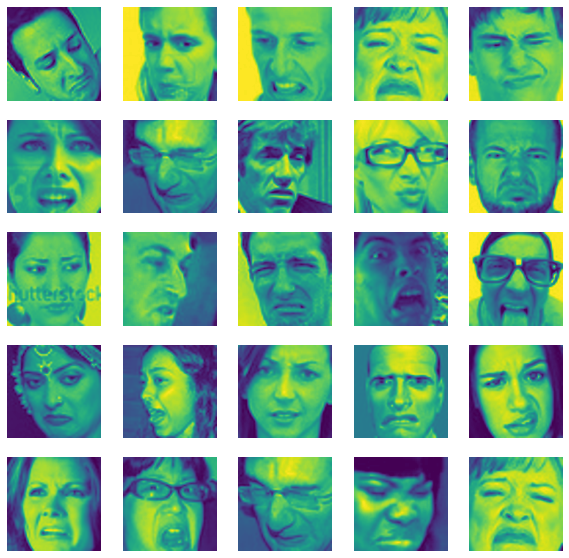

In [3]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
PIC_DIR = 'train/disgust/'
IMAGES_COUNT = 436
ORIG_WIDTH = 48
ORIG_HEIGHT = 48
diff = (ORIG_HEIGHT - ORIG_WIDTH) // 2
WIDTH = 128
HEIGHT = 128
crop_rect = (0, diff, ORIG_WIDTH, ORIG_HEIGHT - diff)
images = []
for pic_file in tqdm(os.listdir(PIC_DIR)[:IMAGES_COUNT]):
    pic = Image.open(PIC_DIR + pic_file).crop(crop_rect)
    pic=pic.resize((128,128))
    #pic.thumbnail((WIDTH, HEIGHT), Image.ANTIALIAS)
    images.append(np.uint8(pic))#Normalize the images
images = np.array(images) / 255
images.shape#print first 25 images
plt.figure(1, figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(images[i])
    plt.axis('off')
plt.show()

In [4]:
LATENT_DIM = 32
CHANNELS = 1
def create_generator():
    gen_input = Input(shape=(LATENT_DIM, ))
    print(gen_input)
    x = Dense(128 * 16 * 16)(gen_input)
    x = LeakyReLU()(x)
    x = Reshape((16, 16, 128))(x)
    
    x = Conv2D(256, 5, padding='same')(x)
    x = LeakyReLU()(x)
    
    x = Conv2DTranspose(256, 4, strides=2, padding='same')(x)
    x = LeakyReLU()(x)
    
    x = Conv2DTranspose(256, 4, strides=2, padding='same')(x)
    x = LeakyReLU()(x)
    
    x = Conv2DTranspose(256, 4, strides=2, padding='same')(x)
    x = LeakyReLU()(x)
    
    x = Conv2D(512, 5, padding='same')(x)
    x = LeakyReLU()(x)
    x = Conv2D(512, 5, padding='same')(x)
    x = LeakyReLU()(x)
    x = Conv2D(CHANNELS, 7, activation='tanh', padding='same')(x)
    
    generator = Model(gen_input, x)
    return generator

In [5]:
def create_discriminator():
    disc_input = Input(shape=(128, 128, CHANNELS))
    
    x = Conv2D(256, 3)(disc_input)
    x = LeakyReLU()(x)
    
    x = Conv2D(256, 4, strides=2)(x)
    x = LeakyReLU()(x)
    
    x = Conv2D(256, 4, strides=2)(x)
    x = LeakyReLU()(x)
    
    x = Conv2D(256, 4, strides=2)(x)
    x = LeakyReLU()(x)
    
    x = Conv2D(256, 4, strides=2)(x)
    x = LeakyReLU()(x)
    
    x = Flatten()(x)
    x = Dropout(0.4)(x)
    
    x = Dense(1, activation='sigmoid')(x)
    discriminator = Model(disc_input, x)
    
    optimizer = RMSprop(
        lr=.0001,
        clipvalue=1.0,
        decay=1e-8
    )
    
    discriminator.compile(
        optimizer=optimizer,
        loss='binary_crossentropy'
    )
    
    return discriminator

In [6]:
generator = create_generator()
discriminator = create_discriminator()
discriminator.trainable = False
gan_input =Input(shape=(LATENT_DIM, ))
gan_output = discriminator(generator(gan_input))
gan = Model(gan_input, gan_output)#Adversarial Model
optimizer = tf.keras.optimizers.RMSprop(lr=.0001, clipvalue=1.0, decay=1e-8)
gan.compile(optimizer=optimizer, loss='binary_crossentropy')

Tensor("input_1:0", shape=(None, 32), dtype=float32)


In [ ]:
import time
iters = 20000
batch_size = 16
RES_DIR = 'train/res2/'
FILE_PATH = '%s/generated_%d.png'
if not os.path.isdir(RES_DIR):
    os.mkdir(RES_DIR)
CONTROL_SIZE_SQRT = 6
control_vectors = np.random.normal(size=(CONTROL_SIZE_SQRT**2, LATENT_DIM)) / 2
start = 0
d_losses = []
a_losses = []
images_saved = 0
for step in range(iters):
    start_time = time.time()
    latent_vectors = np.random.normal(size=(batch_size, LATENT_DIM))
    generated = generator.predict(latent_vectors)
    
    real = images[start:start + batch_size]
    #print(generated)
    #plt.imshow(generated)
#     print(np.shape(generated))
#     print(np.shape(real))
    combined_images = np.concatenate([generated, real.reshape(16,128,128,1)])
    
    labels = np.concatenate([np.ones((batch_size, 1)), np.zeros((batch_size, 1))])
    labels += .05 * np.random.random(labels.shape)
    
    d_loss = discriminator.train_on_batch(combined_images, labels)
    d_losses.append(d_loss)
    
    latent_vectors = np.random.normal(size=(batch_size, LATENT_DIM))
    misleading_targets = np.zeros((batch_size, 1))
    
    a_loss = gan.train_on_batch(latent_vectors, misleading_targets)
    a_losses.append(a_loss)
    
    start += batch_size
    if start > images.shape[0] - batch_size:
        start = 0
    
    if step % 50 == 49:
        gan.save_weights('gan.h5')
        
        print('%d/%d: d_loss: %.4f,  a_loss: %.4f.  (%.1f sec)' % (step + 1, iters, d_loss, a_loss, time.time() - start_time))
        
        control_image = np.zeros((WIDTH * CONTROL_SIZE_SQRT, HEIGHT * CONTROL_SIZE_SQRT, CHANNELS))
        control_generated = generator.predict(control_vectors)
        for i in range(CONTROL_SIZE_SQRT ** 2):
            x_off = i % CONTROL_SIZE_SQRT
            y_off = i // CONTROL_SIZE_SQRT
            control_image[x_off * WIDTH:(x_off + 1) * WIDTH, y_off * HEIGHT:(y_off + 1) * HEIGHT, :] = control_generated[i, :, :, :]
        im = Image.fromarray(np.uint8(control_image * 255))
        im.save(FILE_PATH % (RES_DIR, images_saved))
        images_saved += 1

In [6]:
import numpy as np

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Conv2D, Flatten, Dense, Conv2DTranspose, Reshape, Lambda, Activation, BatchNormalization, LeakyReLU, Dropout
from keras.models import Model
from keras import backend as K
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint 
from keras.utils import plot_model

In [ ]:
filenames = np.array(glob(os.path.join(train/disgust, '*/*.jpg')))
NUM_IMAGES = len(filenames)
print("Total number of images : " + str(NUM_IMAGES))
# prints : Total number of images : 202599


INPUT_DIM = (48,48,3) # Image dimension
BATCH_SIZE = 
Z_DIM = 200 # Dimension of the latent vector (z)

data_flow = ImageDataGenerator(rescale=1./255).flow_from_directory(DATA_FOLDER, 
                                                                   target_size = INPUT_DIM[:2],
                                                                   batch_size = BATCH_SIZE,
                                                                   shuffle = True,
                                                                   class_mode = 'input',
                                                                   subset = 'training'
                                                                   )

In [ ]:
df=

In [11]:
### normal data augmentation

In [13]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=10, # rotation
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.2,1.2]) # brightness

Using TensorFlow backend.


In [19]:
from keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet', include_top=False)
model = Sequential()
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dense(output_dim = 7, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

earlystop=EarlyStopping(monitor='val_loss',min_delta=0,
                        patience=3,
                        verbose=1,
                        restore_best_weights=True)
##
##
callbacks=[earlystop]

model.fit(X_train, train_y, 
          batch_size=128,  
          epochs=epochs, 
#           callbacks=callbacks,
          validation_data=(X_test, test_y),  
          shuffle=True) 


fer_json = model.to_json()  
with open("fer_dce_vgg16.json", "w") as json_file:  
    json_file.write(fer_json)  
model.save_weights("fer_dce_vgg16.h5") 

C:\Users\dmsss\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=7)`
  # Remove the CWD from sys.path while we load stuff.


In [99]:
import glob
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import pandas as pd
import numpy as np
from PIL import Image
import cv2
from keras.utils import np_utils
from PIL import Image, ImageEnhance
import torch
import torch.nn as nn
import torchvision
import torch.backends.cudnn as cudnn
import torch.optim
import os
import sys
import argparse
import time
import dataloader
import model
import numpy as np
from torchvision import transforms
from PIL import Image
import glob
import time
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
from keras.layers import Dense, Dropout, Activation, Flatten  
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
from keras.losses import categorical_crossentropy  
from keras.optimizers import Adam  
#l2:allows you to add a penalty for weight size to the loss function
from keras.regularizers import l2 
#np_utils:Numpy-related utilities. 
from keras.utils import np_utils  
import pandas as pd 
import os  
import cv2  
import numpy as np  
from keras.models import model_from_json  
from keras.preprocessing import image  
j=0
for img in glob.glob(r"C:\Users\dmsss\Downloads\images\miscleneous\disgust\*.jpg"):  
    j=j+1
    #val=np.asarray(list(row['pixels'].split(' ')),dtype=np.uint8)
    img=cv2.imread(img)
    img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #img=img.reshape((48,48))
    img=cv2.resize(img,(48,48))
    new_image = Image.fromarray(img)
    enhancer = ImageEnhance.Brightness(new_image)
    factor = 0.1 #darkens the image
    im_output = enhancer.enhance(factor)
    save_loc="friends/miscleneous/dark/disgust/"+str(j)+".jpg"
    im_output.save(save_loc)
    os.environ['CUDA_VISIBLE_DEVICES']='0'
    data_lowlight = Image.open(save_loc).convert('RGB')
    data_lowlight = (np.asarray(data_lowlight)/255.0)
    data_lowlight = torch.from_numpy(data_lowlight).float()
    data_lowlight = data_lowlight.permute(2,0,1)
    data_lowlight = data_lowlight.unsqueeze(0)
    DCE_net = model.enhance_net_nopool()
    DCE_net.load_state_dict(torch.load('snapshots/Epoch99.pth',map_location=torch.device('cpu')))
    start = time.time()
    _,enhanced_image,_ = DCE_net(data_lowlight)
    image_path = "friends/miscleneous/dce/disgust/"+str(j)+'.jpg'
    result_path = image_path
    if not os.path.exists(image_path.replace('/'+image_path.split("/")[-1],'')):
        os.makedirs(image_path.replace('/'+image_path.split("/")[-1],''))
    torchvision.utils.save_image(enhanced_image, result_path)

In [100]:
X_train,train_y,X_test,test_y=[],[],[],[]  
d=[]

In [2]:
pu_d=[]
pu_d_y=[]

In [41]:
d=[]

In [39]:
import glob
import cv2
import numpy as np
from IPython.display import Image, display
i=0
for imageName in glob.glob(r'S:\PROJECTS\ImageProcessing_sentimentAnalysis\Emotion Detection\image enhancement\Zero-DCE-master\Zero-DCE_code\friends\\*.JPG'):
    i=i+1
    a=cv2.imread(imageName)
    a = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
    a=a.reshape((48,48))
    #print(a)
    X_train.append(np.array(a,'float32'))
    d.append(np.array(a,'float32'))
    train_y.append(6)
    if i==3000:
        break

In [ ]:
import glob
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import pandas as pd
import numpy as np
from PIL import Image
import cv2
from keras.utils import np_utils
from PIL import Image, ImageEnhance
import torch
import torch.nn as nn
import torchvision
import torch.backends.cudnn as cudnn
import torch.optim
import os
import sys
import argparse
import time
import dataloader
import model
import numpy as np
from torchvision import transforms
from PIL import Image
import glob
import time
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
from keras.layers import Dense, Dropout, Activation, Flatten  
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
from keras.losses import categorical_crossentropy  
from keras.optimizers import Adam  
#l2:allows you to add a penalty for weight size to the loss function
from keras.regularizers import l2 
#np_utils:Numpy-related utilities. 
from keras.utils import np_utils  
import pandas as pd 
import os  
import cv2  
import numpy as np  
from keras.models import model_from_json  
from keras.preprocessing import image  
num_features = 64  
num_labels = 7  
batch_size = 64  
epochs = 100  
width, height = 48, 48  


X_train2 = np.array(X_train,'float32')  
train_y2 = np.array(train_y,'float32')  
X_test2 = np.array(X_test,'float32')  
test_y2 = np.array(test_y,'float32')  

train_y2=np_utils.to_categorical(train_y2, num_classes=num_labels)  
test_y2=np_utils.to_categorical(test_y2, num_classes=num_labels)  


X_train2 -= np.mean(X_train2, axis=0)  
X_train2 /= np.std(X_train2, axis=0)  

X_test2 -= np.mean(X_test2, axis=0)  
X_test2 /= np.std(X_test2, axis=0)  

X_train2 = X_train2.reshape(X_train2.shape[0], 48, 48, 1)  

X_test2 = X_test2.reshape(X_test2.shape[0], 48, 48, 1)  

# print(f"shape:{X_train.shape}")  
##designing the cnn  
#1st convolution layer  
model = Sequential()  
#ist layer

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(X_train2.shape[1:])))  
# model.add(Conv2D(32,kernel_size= (3, 3), activation='relu'))  
model.add(BatchNormalization())  
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))  
model.add(Dropout(0.5))  

########################

# #2nd convolution layer  
model.add(Conv2D(64, (3, 3), activation='relu'))  
# model.add(Conv2D(64, (3, 3), activation='relu'))  
model.add(BatchNormalization())  
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))  
model.add(Dropout(0.5))  

########################
model.add(Conv2D(128, (3, 3), activation='relu'))  
# model.add(Conv2D(128, (3, 3), activation='relu'))  
model.add(BatchNormalization())  
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))  
model.add(Dropout(0.5))  

########################

########################

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
 

model.add(Dense(1024, activation='relu'))  
model.add(Dropout(0.5))  

model.add(Dense(7, activation='softmax'))  

# model.summary()  

#Compliling the model  
model.compile(loss='categorical_crossentropy',  
              optimizer=Adam(lr=0.001),  
              metrics=['accuracy'])  
##
earlystop=EarlyStopping(monitor='val_loss',min_delta=0,
                        patience=5,
                        verbose=1,
                        restore_best_weights=True)
##
# reduce_lr=ReduceLROnPlateau(monitor='var_loss',
#                             factor=0.2,
#                             patience=3,
#                             verbose=1,
#                             min_delta=0.0001)
##
callbacks=[earlystop]
#Training the model  
model.fit(X_train2, train_y2,  
          batch_size=batch_size,  
          epochs=epochs,  
          callbacks=callbacks,
          validation_data=(X_test2, test_y2),  
          shuffle=True)  


#Saving the  model to  use it later on  
fer_json = model.to_json()  
with open("feraug2allplus3000.json", "w") as json_file:  
    json_file.write(fer_json)  
model.save_weights("feraug2allplus3000.h5") 

In [43]:
train_y2 = np.array(train_y,'float32') 

In [44]:
from collections import Counter



Counter(train_y2).keys() # equals to list(set(words))
Counter(train_y2).values() # counts the elements' frequency

dict_values([6995, 4788, 8097, 7215, 7830, 6171, 7965])

In [45]:
X_test,test_y=[],[]

In [103]:
d=[]

In [116]:
import glob
from IPython.display import Image, display
import cv2
import numpy as np
for imageName in glob.glob(r'S:\PROJECTS\ImageProcessing_sentimentAnalysis\Emotion Detection\image enhancement\Zero-DCE-master\Zero-DCE_code\friends\siva\dce\angry\*.JPG'):
    a=cv2.imread(imageName)
    a = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
    a=a.reshape((48,48))
    d.append(np.array(a,'float32'))
    #print(a)
    X_test.append(np.array(a,'float32'))
    test_y.append(0) 

In [50]:
import numpy as np
x=np.array(test_y)
np.unique(x)

array([0, 1, 2, 3, 4, 5, 6])

In [ ]:

import os 
os.system("shutdown /s /t 1") 

In [53]:
pu_d=[]
pu_d_y=[]

In [73]:
d=[]

In [76]:

import glob
from IPython.display import Image, display
import cv2
import numpy as np
for imageName in glob.glob(r'S:\PROJECTS\ImageProcessing_sentimentAnalysis\Emotion Detection\image enhancement\Zero-DCE-master\Zero-DCE_code\dce_fer\PrivateTest\6\*.JPG'):
    a=cv2.imread(imageName)
    #a = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
    a=a.reshape((48,48))
    d.append(np.array(a,'float32'))
    #print(imageName)
    pu_d.append(np.array(a,'float32'))
    pu_d_y.append(6) 

In [77]:
from keras.utils import np_utils  

num_labels = 7   
width, height = 48, 48  
  
pu_d = np.array(pu_d,'float32')  
pu_d_y = np.array(pu_d_y,'float32')  
####
 

##



  
pu_d_y=np_utils.to_categorical(pu_d_y, num_classes=num_labels)  
 

 

 
pu_d -= np.mean(pu_d, axis=0)  
pu_d /= np.std(pu_d, axis=0) 
pu_d = pu_d.reshape(pu_d.shape[0], 48, 48, 1)  



Using TensorFlow backend.


In [21]:
from tensorflow.keras.models import model_from_json  

model = model_from_json(open("ferdce4_3layer.json", "r").read())  
#load weights  
model.load_weights('ferdce4_3layer.h5')  
pu_d_o=[]
for i in X_test:
    pu_d_o.append(np.argmax(model.predict(i.reshape(1,48,48,3))))
pu_d_o2=np_utils.to_categorical(pu_d_o, num_classes=num_labels)
import sklearn
from sklearn.metrics import accuracy_score

print(sklearn.metrics.accuracy_score(test_y, pu_d_o2))

0.5486207857341878


In [16]:
print(sklearn.metrics.accuracy_score(test_y, pu_d_o2))

0.4803566453050989


In [ ]:
#('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')

In [134]:
import glob
import cv2
i=0
for imgn in glob.glob(r'C:\Users\dmsss\Downloads\capstone emotion analyses\imag_rgb\Training\2\*.jpg'):
    img=cv2.imread(imgn)
    i=i+1
    #print(img.shape)
print(i)

4097


# Machine Learning

## SVM

In [1]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

import pandas as pd
import numpy as np

from PIL import Image


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

from sklearn.metrics import roc_curve, auc

In [2]:
X_train,train_y,X_test,test_y=[],[],[],[]

In [17]:
import glob
from IPython.display import Image, display
import cv2
import numpy as np
i=0
for imageName in glob.glob(r'S:\PROJECTS\ImageProcessing_sentimentAnalysis\Emotion Detection\image enhancement\Zero-DCE-master\Zero-DCE_code\dce_fer\Training\aug2neutral\*.JPG'):
    a=cv2.imread(imageName)
    a = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
    a=a.flatten()
    #a=a.reshape((48,48))
    #d.append(np.array(a,'float32'))
    #print(a)
    X_train.append(np.array(a,'float32'))
    train_y.append(6)
    i=i+1
    if i==1000:
        break

In [94]:
from collections import Counter



Counter(pu_d_y).keys() # equals to list(set(words))
Counter(pu_d_y).values() # counts the elements' frequency

dict_values([958, 111, 1024, 1774, 1247, 831, 1233])

In [19]:
from sklearn import svm, metrics, datasets
from sklearn.model_selection import GridSearchCV, train_test_split
svc = svm.SVC()
model=svc.fit(X_train,train_y)

In [96]:
pu_d=[]
pu_d_y=[]

In [110]:

import glob
from IPython.display import Image, display
import cv2
import numpy as np
for imageName in glob.glob(r'S:\PROJECTS\ImageProcessing_sentimentAnalysis\Emotion Detection\image enhancement\Zero-DCE-master\Zero-DCE_code\dce_fer\PrivateTest\6\*.JPG'):
    a=cv2.imread(imageName)
    a = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
    #a=a.reshape((48,48))
    #d.append(np.array(a,'float32'))
    #print(a)
    a=a.flatten()
    pu_d.append(np.array(a,'float32'))
    pu_d_y.append(6) 

In [47]:
import sklearn
from sklearn.metrics import accuracy_score

print(sklearn.metrics.accuracy_score(pu_d_y, y_pred))

0.41680395387149916


In [ ]:
pu_d=[]
pu_d_y=[]

In [ ]:

import glob
from IPython.display import Image, display
import cv2
import numpy as np
for imageName in glob.glob(r'S:\PROJECTS\ImageProcessing_sentimentAnalysis\Emotion Detection\image enhancement\Zero-DCE-master\Zero-DCE_code\dce_fer\PublicTest\6\*.JPG'):
    a=cv2.imread(imageName)
    a = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
    #a=a.reshape((48,48))
    #d.append(np.array(a,'float32'))
    #print(a)
    a=a.flatten()
    pu_d.append(np.array(a,'float32'))
    pu_d_y.append(6) 

In [1]:

#Sequential to build a model layer by layer..Each layer has weights that correspond to the layer the follows it..
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten  
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
#categorical_crossentropy : don't know
from tensorflow.keras.losses import categorical_crossentropy  
#adam:replacement optimization algorithm for stochastic gradient descent for training deep learning models.#don't understand what it is 
from tensorflow.keras.optimizers import Adam  
#l2:allows you to add a penalty for weight size to the loss function
from tensorflow.keras.regularizers import l2 
#np_utils:Numpy-related utilities. 
from keras.utils import np_utils  
import pandas as pd
import cv2
import numpy as np
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
df=pd.read_csv('fer2013.csv')  
X_train,train_y,X_test,test_y=[],[],[],[]  
j=0
for index, row in df.iterrows():  
    j=j+1
    image_path = 'dce_fer/'+row['Usage']+'/'+str(row['emotion'])+'/'+str(j)+'.jpg'
    im=cv2.imread(image_path)
    im= cv2.resize(im, (48,48))
    if 'Training' in row['Usage']:  
        X_train.append(np.array(im,'float32'))  
        train_y.append(row['emotion'])  
    elif 'PublicTest' in row['Usage']:  
        X_test.append(np.array(im,'float32'))  
        test_y.append(row['emotion'])
num_features = 64  
num_labels = 7  
batch_size = 64  
epochs = 30  
width, height = 48, 48  


train_y=np_utils.to_categorical(train_y, num_classes=7)  
test_y=np_utils.to_categorical(test_y, num_classes=7)  

 
X_train -= np.mean(X_train, axis=0)  
X_train /= np.std(X_train, axis=0)  

X_test -= np.mean(X_test, axis=0)  
X_test /= np.std(X_test, axis=0)  

X_train = X_train.reshape(X_train.shape[0], 48, 48, 3)  

X_test = X_test.reshape(X_test.shape[0], 48, 48, 3)  


Using TensorFlow backend.


In [2]:
from tensorflow.keras.models import model_from_json    
model = model_from_json(open("ferdce3_3layer.json", "r").read())  
#load weights  
model.load_weights('ferdce3_3layer.h5')  


In [3]:
pu_d=X_test
pu_d_o=[]
for i in pu_d:
    pu_d_o.append(np.argmax(model.predict(i.reshape(1,48,48,3))))
pu_d_o2=np_utils.to_categorical(pu_d_o, num_classes=num_labels)
import sklearn
from sklearn.metrics import accuracy_score

print(sklearn.metrics.accuracy_score(test_y, pu_d_o2))

0.5475062691557537


## Random forrest classifier

In [112]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

In [113]:
modelrf=forest_clf.fit(X_train,train_y)

In [114]:
y_pred=modelrf.predict(pu_d)

In [115]:
import sklearn
from sklearn.metrics import accuracy_score

print(sklearn.metrics.accuracy_score(pu_d_y, y_pred))

0.45904151574254665
